# **Entregable 1: Reto**

Cristobal Medina Meza | A01643121

## Análisis exploratorio

Cargamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos el df

In [ ]:
df = pd.read_parquet('24o_medicom.parquet')

Imprimimos los primeros 5 datos

In [ ]:
df.head()

,fecha,id_material,id_cliente,ventas
0,2013-05-06,768,7939,384.000000000
1,2011-09-20,768,7939,384.000000000
2,2014-01-08,768,7939,384.000000000
3,2011-04-19,768,7939,384.000000000
4,2013-03-21,768,7805,384.000000000


Revisamos si tenemos datos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830517 entries, 0 to 830516
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fecha        830517 non-null  object
 1   id_material  830517 non-null  int64 
 2   id_cliente   830517 non-null  int64 
 3   ventas       830517 non-null  object
dtypes: int64(2), object(2)
memory usage: 25.3+ MB


In [ ]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [ ]:
df["ventas"] = df['ventas'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830517 entries, 0 to 830516
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        830517 non-null  datetime64[ns]
 1   id_material  830517 non-null  int64         
 2   id_cliente   830517 non-null  int64         
 3   ventas       830517 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 25.3 MB


Imprimimos el número de materiales y clientes

In [ ]:
n_materiales = len(df["id_material"].unique())
n_clientes = len(df["id_cliente"].unique())

print(f"Número de materiales: {n_materiales}")
print(f"Número de clientes: {n_clientes}")

Número de materiales: 1471
Número de clientes: 454


In [ ]:
sorted(df["id_material"].unique().tolist())

[582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 635,
 636,
 637,
 639,
 640,
 641,
 642,
 643,
 644,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 697,
 698,
 699,
 700,
 701,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 712,
 715,
 717,
 718,
 721,
 723,
 724,
 725,
 727,
 728,
 729,
 730,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775

## Graficos interesantes

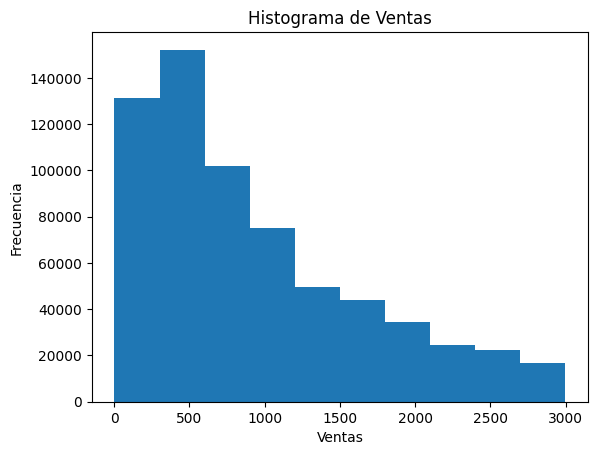

In [ ]:
plt.hist(df[(df["ventas"] > 0) & (df["ventas"] < 3000)]["ventas"])
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.title("Histograma de Ventas")
plt.show()

In [ ]:
df["ventas"].describe()

,ventas
count,8.305170e+05
mean,2.852715e+03
std,1.359340e+04
min,-1.149758e+06
25%,4.230000e+02
50%,9.520000e+02
75%,2.316000e+03
max,2.022000e+06


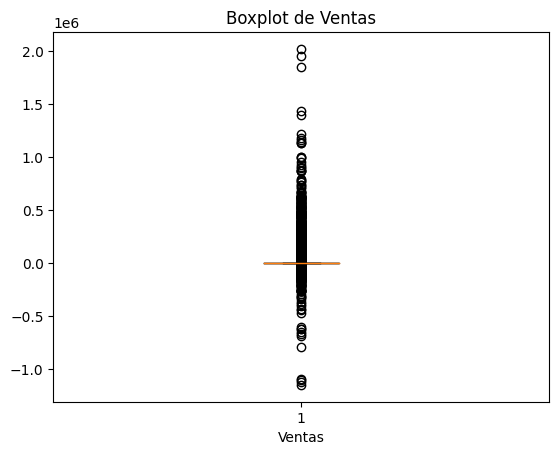

In [ ]:
plt.boxplot(df["ventas"])
plt.xlabel("Ventas")
plt.title("Boxplot de Ventas")
plt.show()


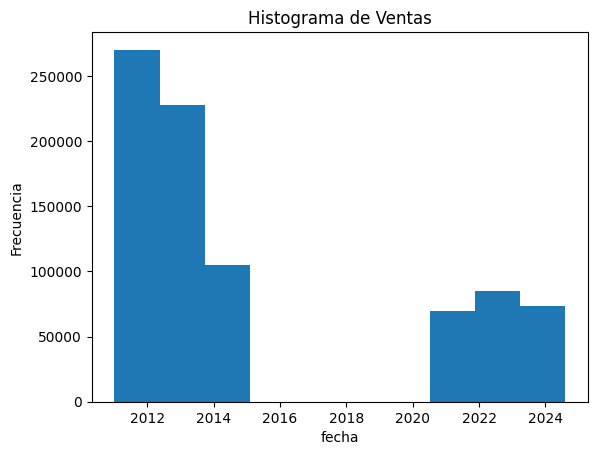

In [ ]:
plt.hist(df["fecha"])
plt.xlabel("fecha")
plt.ylabel("Frecuencia")
plt.title("Histograma de Ventas")
plt.show()

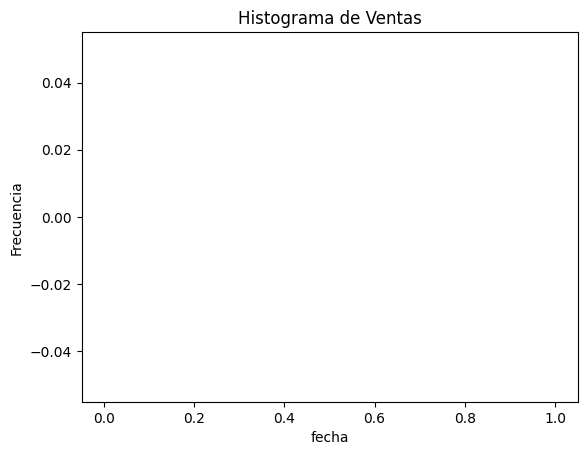

In [ ]:
plt.hist(df[(df["fecha"] > "2016-01-01") & (df["fecha"] < "2020-12-31")]["fecha"])
plt.xlabel("fecha")
plt.ylabel("Frecuencia")
plt.title("Histograma de Ventas")
plt.show()

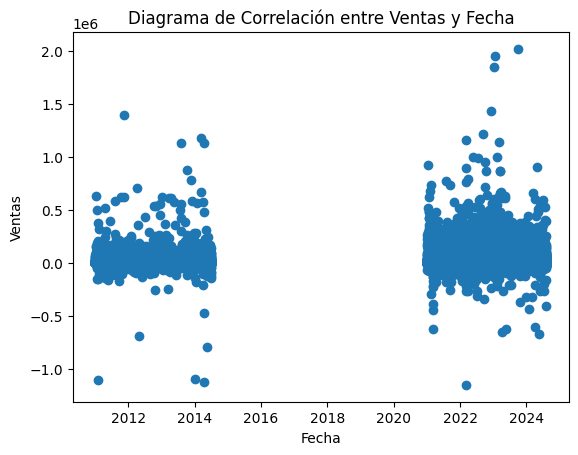

In [ ]:
plt.scatter(df['fecha'], df['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Diagrama de Correlación entre Ventas y Fecha')
plt.show()


## Productos con más ventas en general

In [ ]:
df_ventas_general = df

In [ ]:
df_ventas_general = df_ventas_general.groupby("id_material")["ventas"].transform("sum")

In [ ]:
df_ventas_general = pd.merge(df_ventas_general, df["id_material"], left_index=True, right_index=True)

In [ ]:
df_ventas_general = df_ventas_general.drop_duplicates()

In [ ]:
df_ventas_general__sorted = df_ventas_general.sort_values("ventas", ascending=False)
df_ventas_general__sorted.dropna(inplace=True)
df_ventas_general__sorted.head(3)

,ventas,id_material
266397,134363614,591
498505,123694596,893
343866,120794800,601


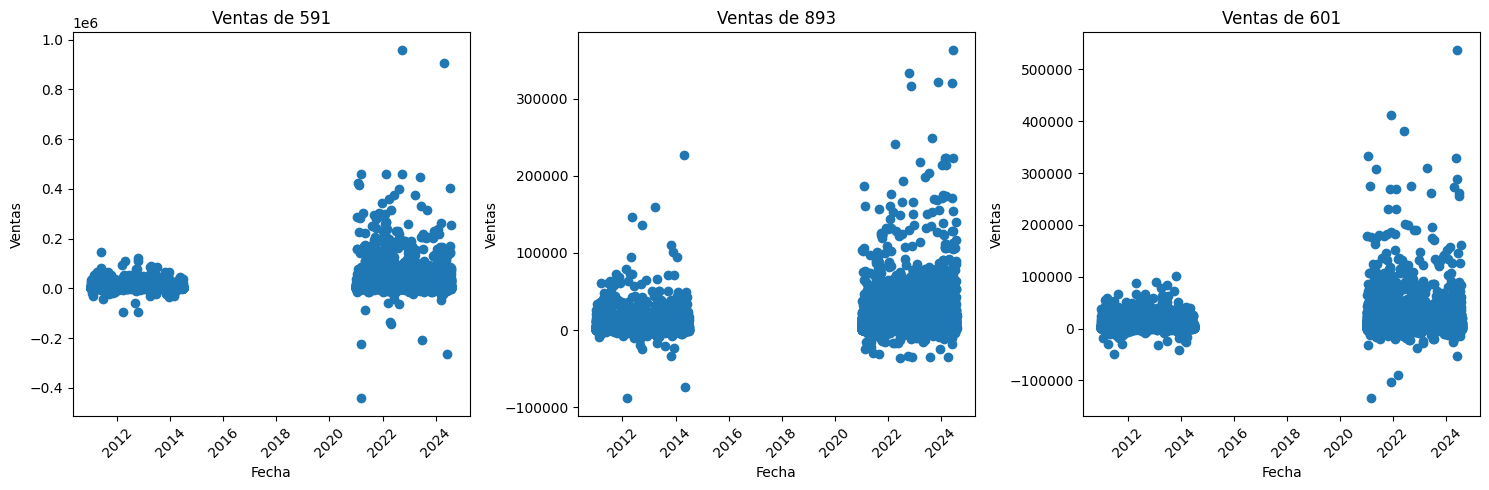

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, material in enumerate(df_ventas_general__sorted['id_material'].head(3)):
    df_material = df[df['id_material'] == material]
    axes[i].scatter(df_material['fecha'], df_material['ventas'])
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas de {material}')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Productos con más ventas a partir de pandemia

In [ ]:
df_ventas_pandemia = df.where(df["fecha"] > "2020-01-01")

In [ ]:
df_ventas_pandemia = df_ventas_pandemia.groupby("id_material")["ventas"].transform("sum")

In [ ]:
df_ventas_pandemia = pd.merge(df_ventas_pandemia, df["id_material"], left_index=True, right_index=True)

In [ ]:
df_ventas_pandemia = df_ventas_pandemia.drop_duplicates()

In [ ]:
df_ventas_pandemia__sorted = df_ventas_pandemia.sort_values("ventas", ascending=False)
df_ventas_pandemia__sorted.dropna(inplace=True)
df_ventas_pandemia__sorted.head(3)

,ventas,id_material
266426,97901667.0,591
343891,84708333.0,601
498536,84651693.0,893


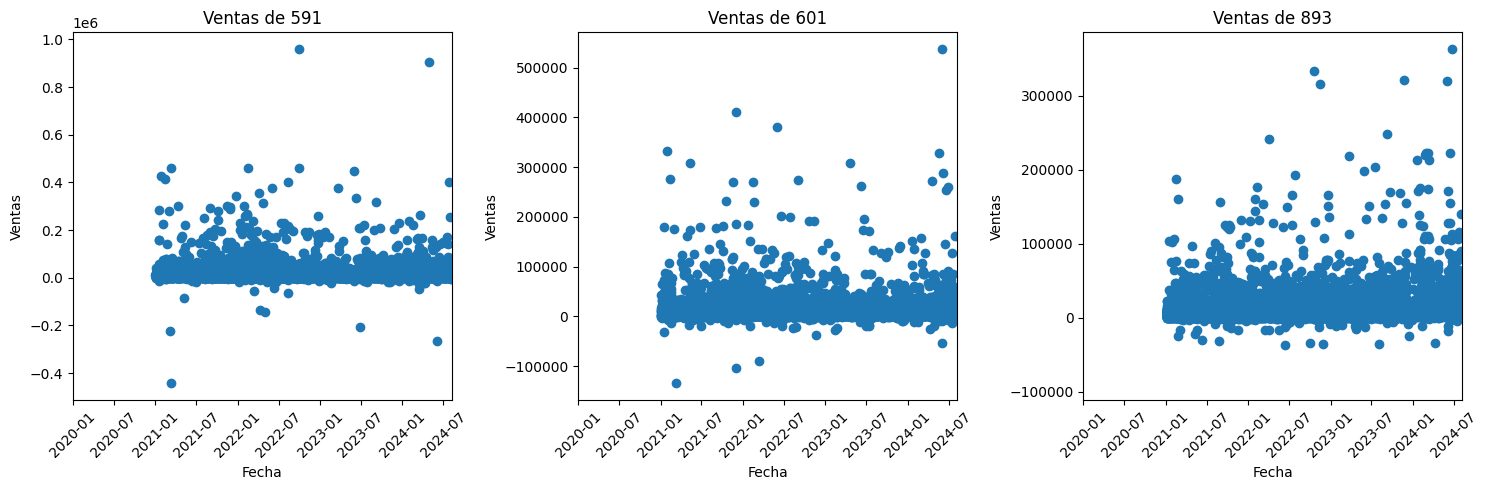

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, material in enumerate(df_ventas_pandemia__sorted['id_material'].head(3)):
    df_material = df[df['id_material'] == material]
    axes[i].scatter(df_material['fecha'], df_material['ventas'])
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas de {material}')
    axes[i].set_xlim([pd.to_datetime('2020-01-01'), df['fecha'].max()])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Productos con mas ventas en el ultimo año

In [ ]:
df_ventas = df.where(df["fecha"] > "2024-01-01")

In [ ]:
df_ventas = df_ventas.groupby("id_material")["ventas"].transform("sum")

In [ ]:
df_ventas = pd.merge(df_ventas, df["id_material"], left_index=True, right_index=True)

In [ ]:
df_ventas = df_ventas.drop_duplicates()

In [ ]:
df_ventas_sorted = df_ventas.sort_values("ventas", ascending=False)
df_ventas_sorted.dropna(inplace=True)
df_ventas_sorted.head(3)

,ventas,id_material
267625,15031885.0,591
245312,14419889.0,590
498536,14215844.0,893


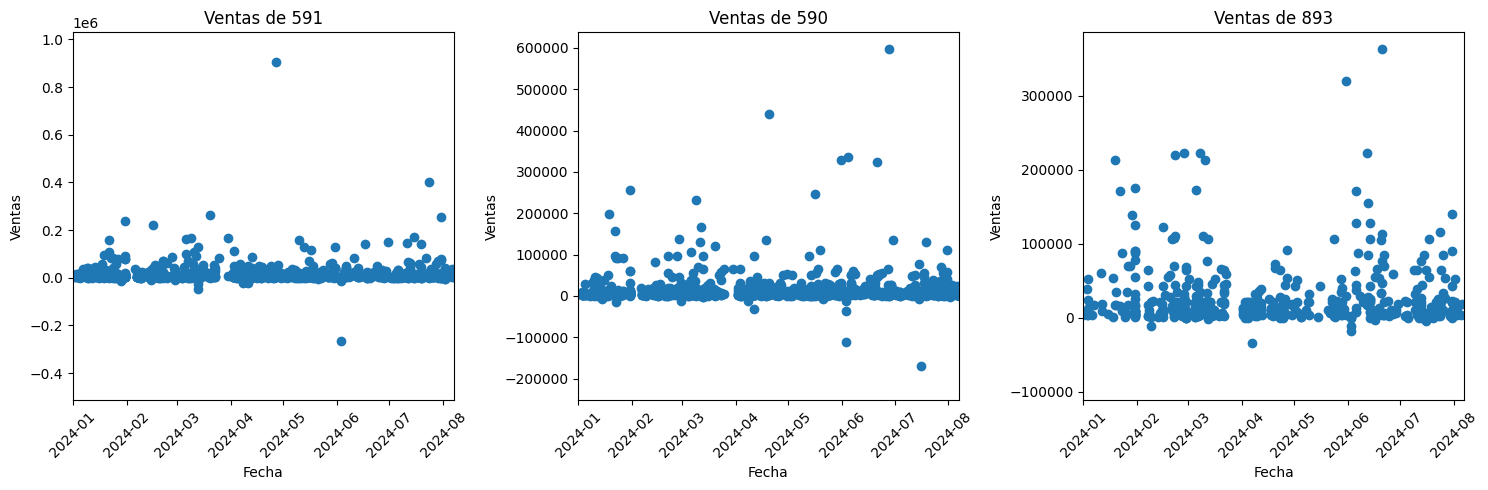

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, material in enumerate(df_ventas_sorted['id_material'].head(3)):
    df_material = df[df['id_material'] == material]
    axes[i].scatter(df_material['fecha'], df_material['ventas'])
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas de {material}')
    axes[i].set_xlim([pd.to_datetime('2024-01-01'), df['fecha'].max()])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Scatterplots de Cristobal

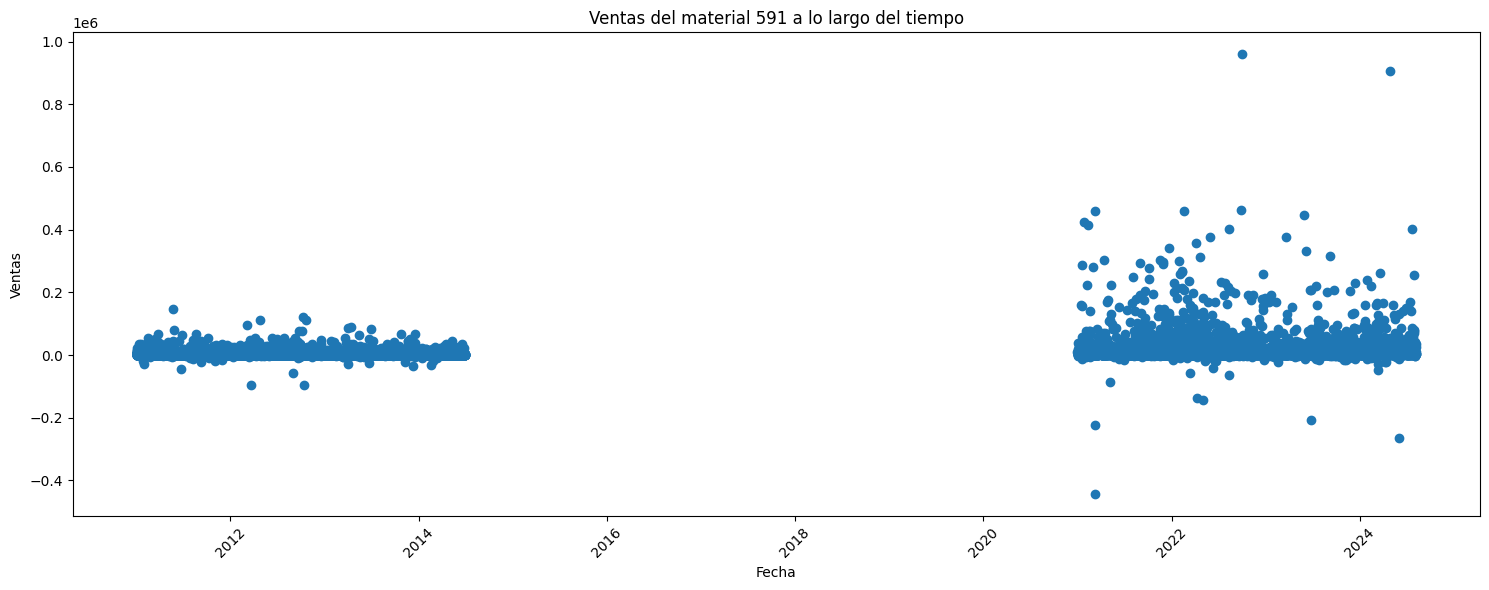

In [ ]:
df_591 = df[df["id_material"] == 591]
plt.figure(figsize=(15, 6))
plt.scatter(df_591['fecha'], df_591['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 591 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

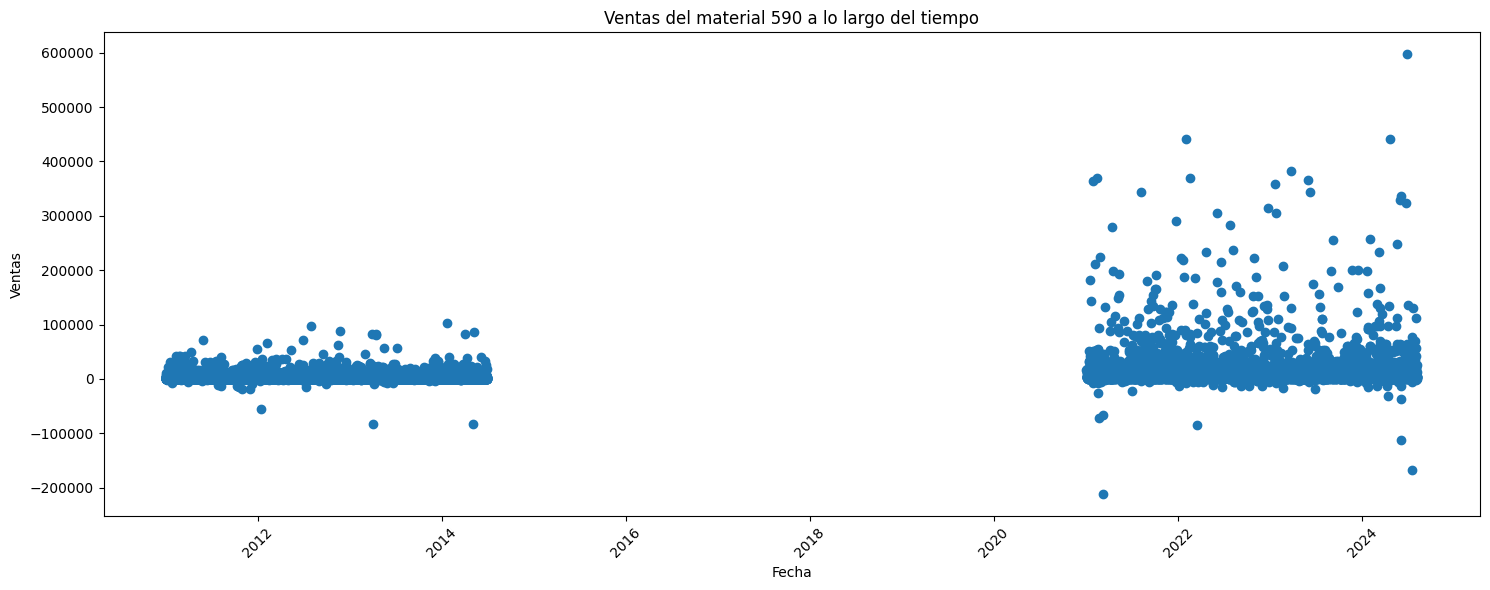

In [ ]:
df_590 = df[df["id_material"] == 590]
plt.figure(figsize=(15, 6))
plt.scatter(df_590['fecha'], df_590['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 590 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

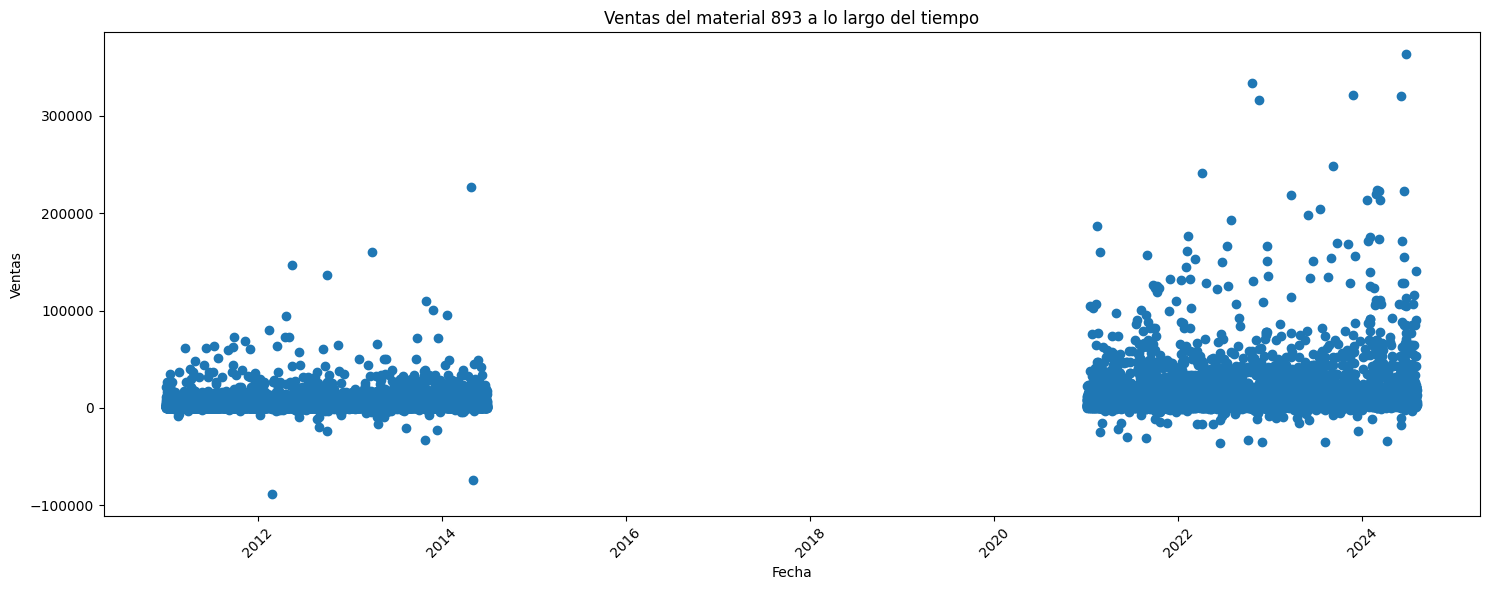

In [ ]:
df_893 = df[df["id_material"] == 893]
plt.figure(figsize=(15, 6))
plt.scatter(df_893['fecha'], df_893['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 893 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Clientes con mas compras

In [ ]:
df_clientes = df.groupby("id_cliente")["ventas"].transform("sum")

In [ ]:
df_clientes = pd.merge(df_clientes, df["id_cliente"], left_index=True, right_index=True)

In [ ]:
df_clientes = df_clientes.drop_duplicates()

In [ ]:
df_clientes_sorted = df_clientes.sort_values("ventas", ascending=False)
df_clientes_sorted

,ventas,id_cliente
473,341975878,8342
287,109567525,8635
1583,78119654,8318
1622,70601783,7713
4646,51659212,7806
...,...,...
661403,-1033,7698
15347,-6863,8202
216934,-10610,8233
164240,-38821,308


## Productos con menos compras en el ultimo año

In [ ]:
df_ventas_sorted.tail(10)

,ventas,id_material
655471,217.0,708
70289,203.0,4618
230561,202.0,588
207800,201.0,3902
301835,62.0,5714
213191,0.0,1600
320249,0.0,598
136698,0.0,7207
79232,-310.0,6929
317942,-1083.0,596


### Graficas de productos con menos compras en el ultimo año

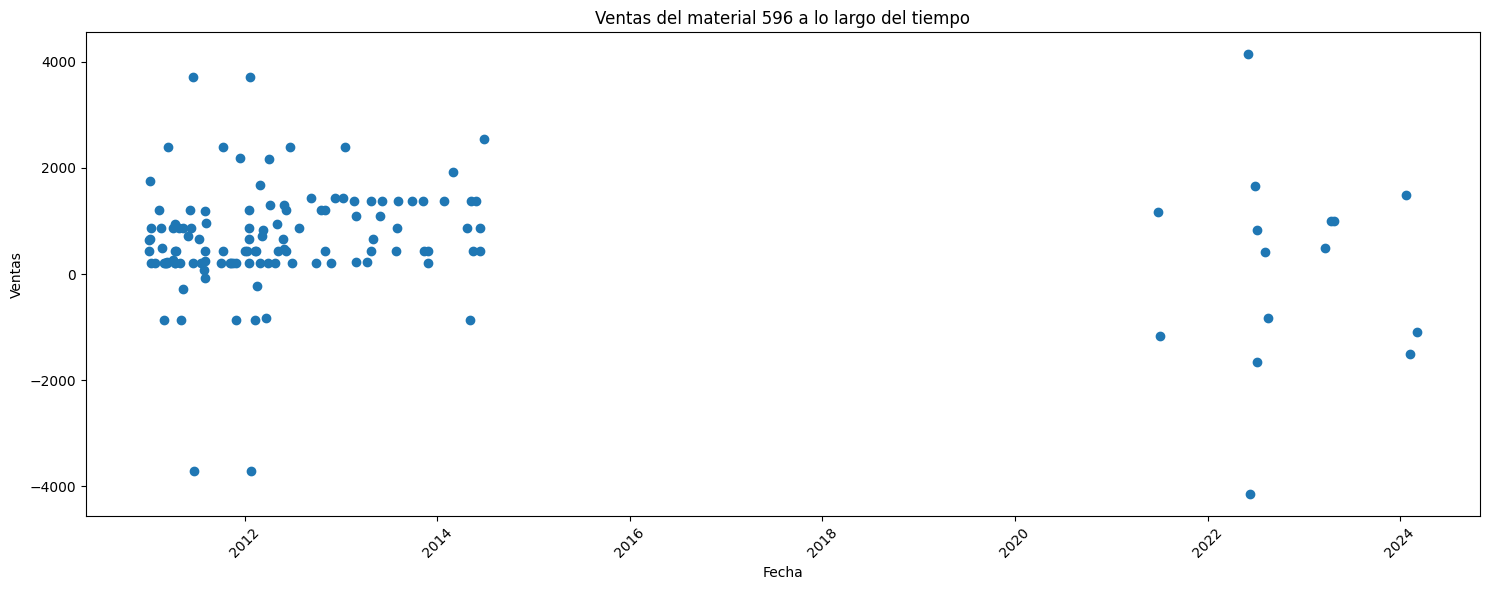

In [ ]:
df_596 = df[df["id_material"] == 596]
plt.figure(figsize=(15, 6))
plt.scatter(df_596['fecha'], df_596['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 596 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

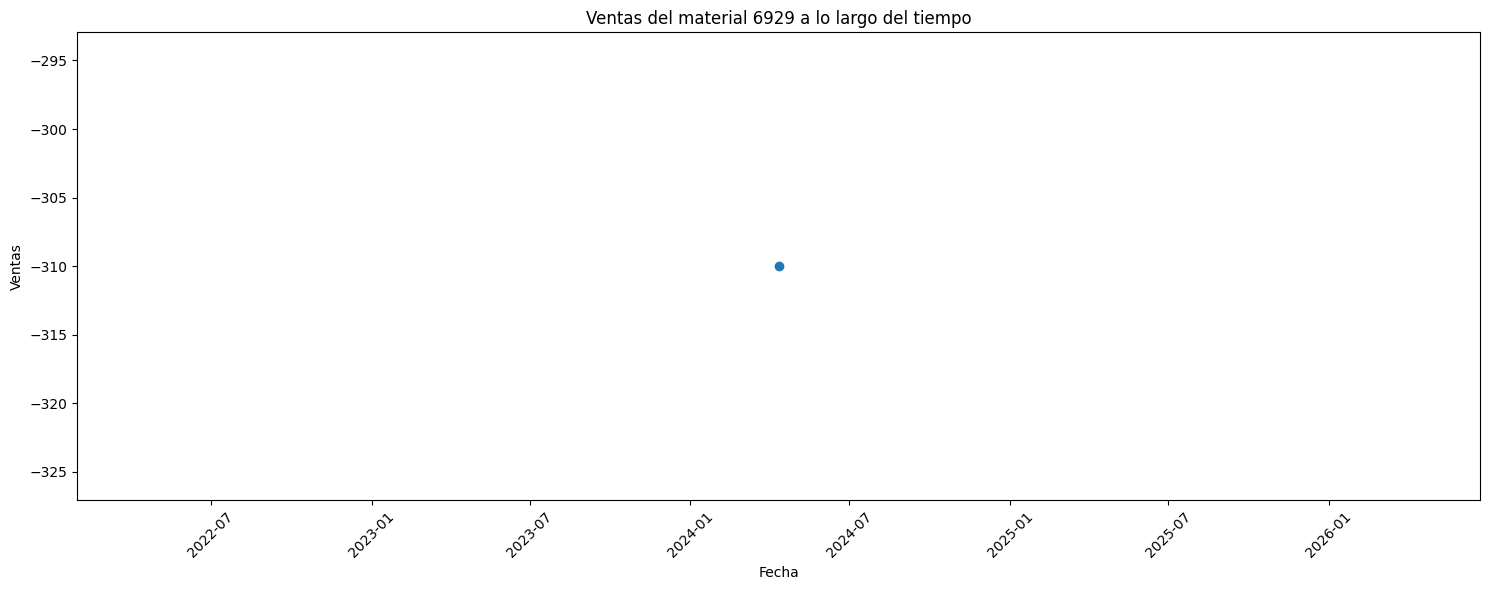

In [ ]:
df_6929 = df[df["id_material"] == 6929]
plt.figure(figsize=(15, 6))
plt.scatter(df_6929['fecha'], df_6929['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 6929 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

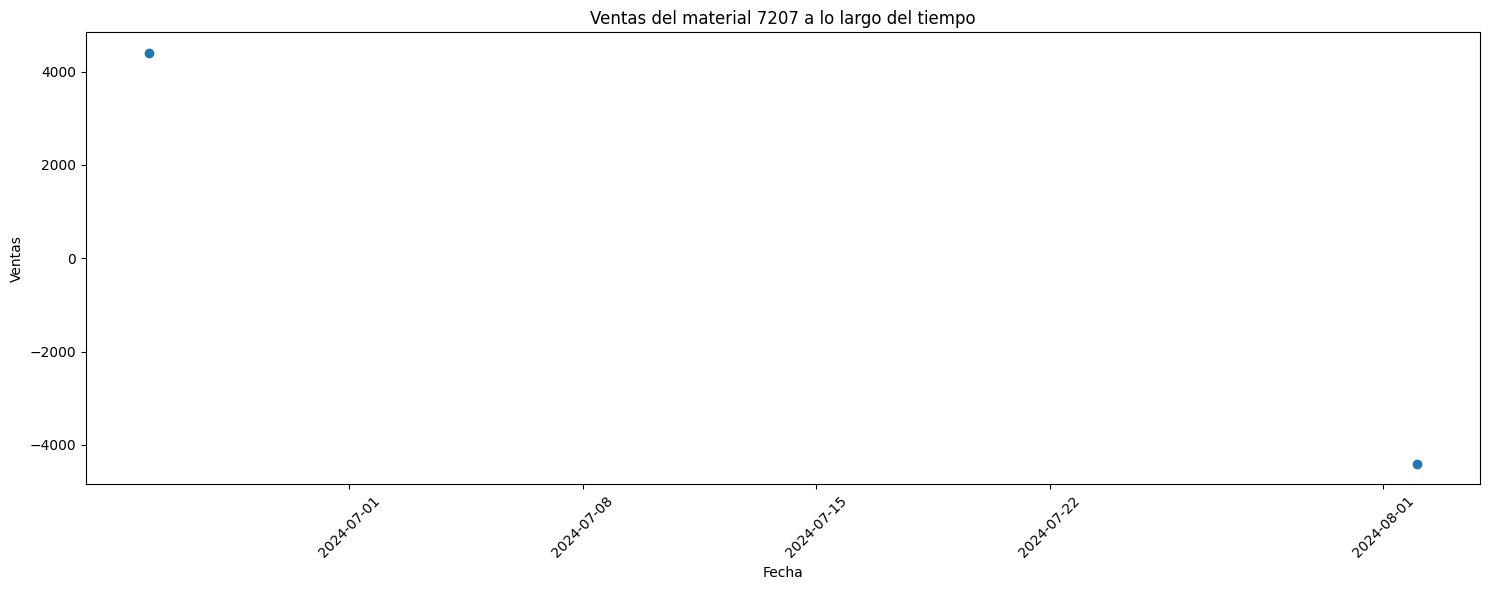

In [ ]:
df_7207 = df[df["id_material"] == 7207]
plt.figure(figsize=(15, 6))
plt.scatter(df_7207['fecha'], df_7207['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 7207 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

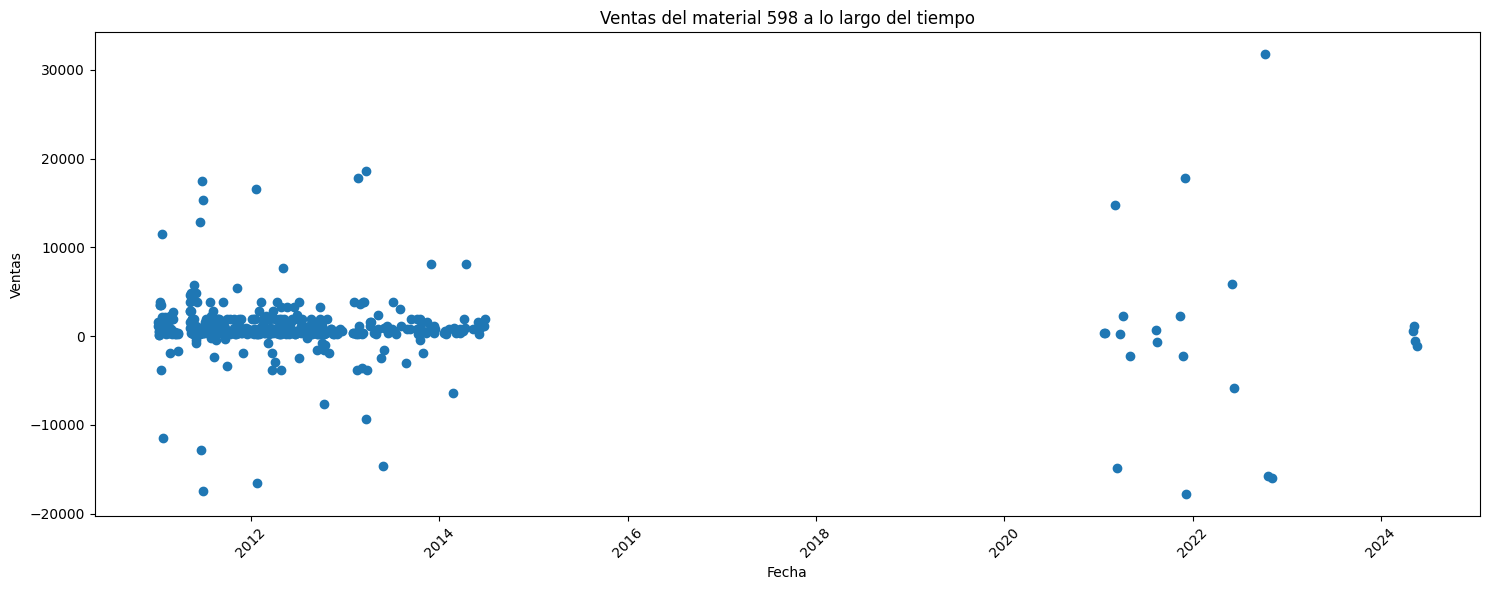

In [ ]:
df_598 = df[df["id_material"] == 598]
plt.figure(figsize=(15, 6))
plt.scatter(df_598['fecha'], df_598['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 598 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

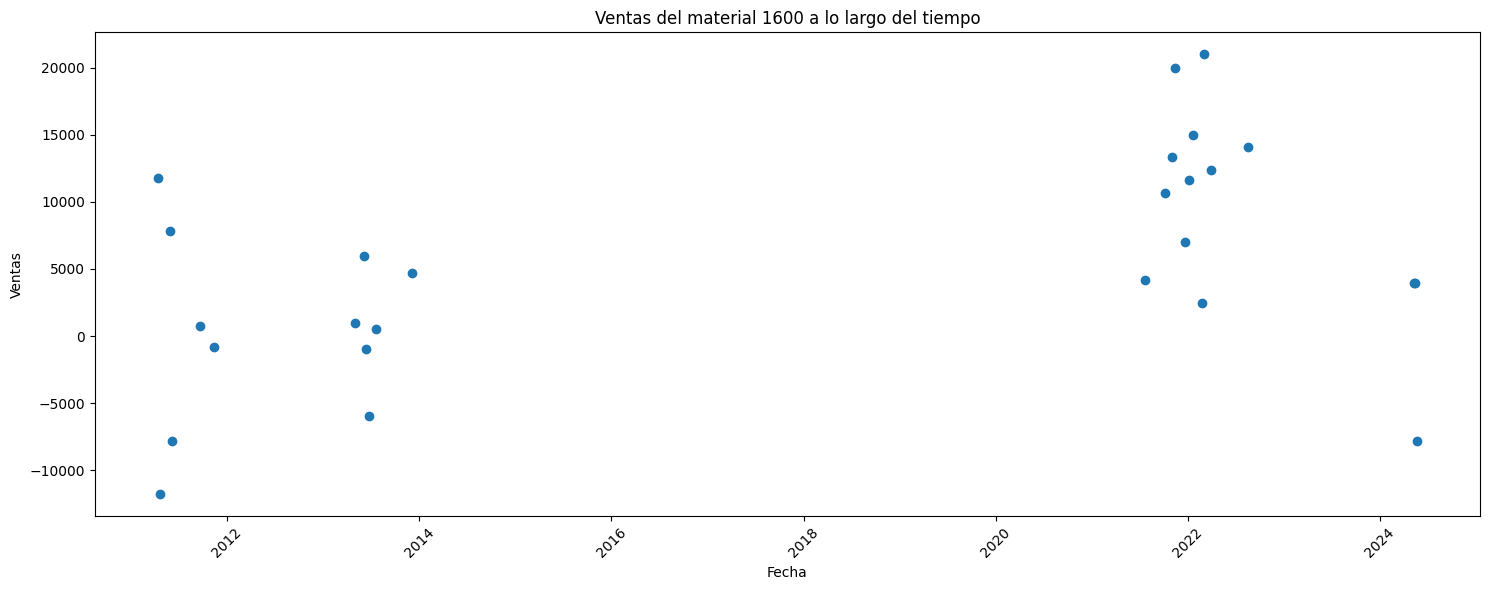

In [ ]:
df_1600 = df[df["id_material"] == 1600]
plt.figure(figsize=(15, 6))
plt.scatter(df_1600['fecha'], df_1600['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 1600 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

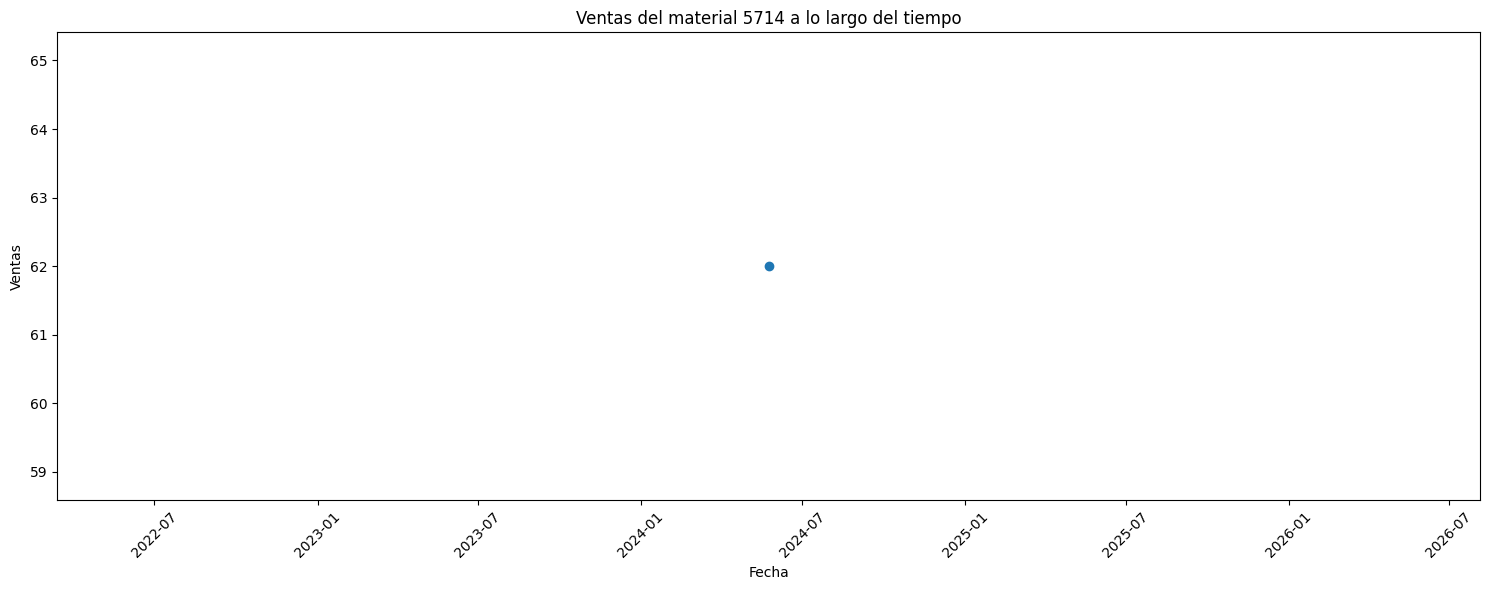

In [ ]:
df_5714 = df[df["id_material"] == 5714]
plt.figure(figsize=(15, 6))
plt.scatter(df_5714['fecha'], df_5714['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 5714 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

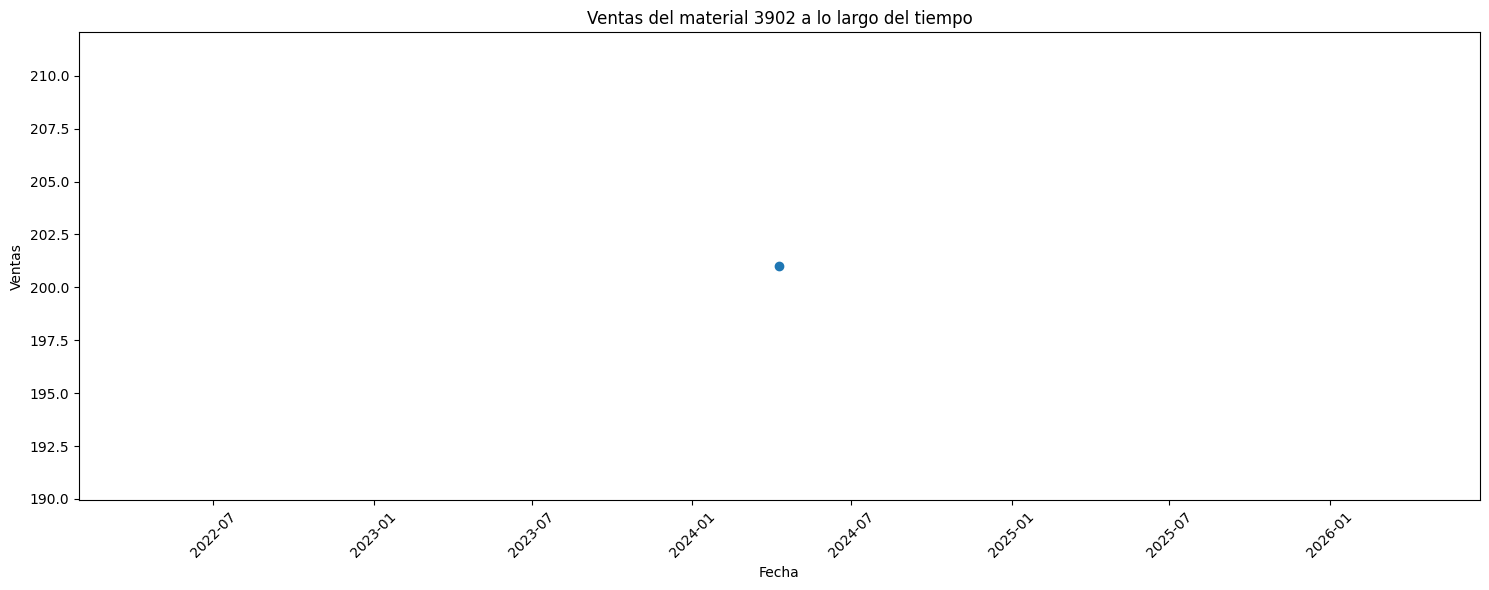

In [ ]:
df_3902 = df[df["id_material"] == 3902]
plt.figure(figsize=(15, 6))
plt.scatter(df_3902['fecha'], df_3902['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 3902 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

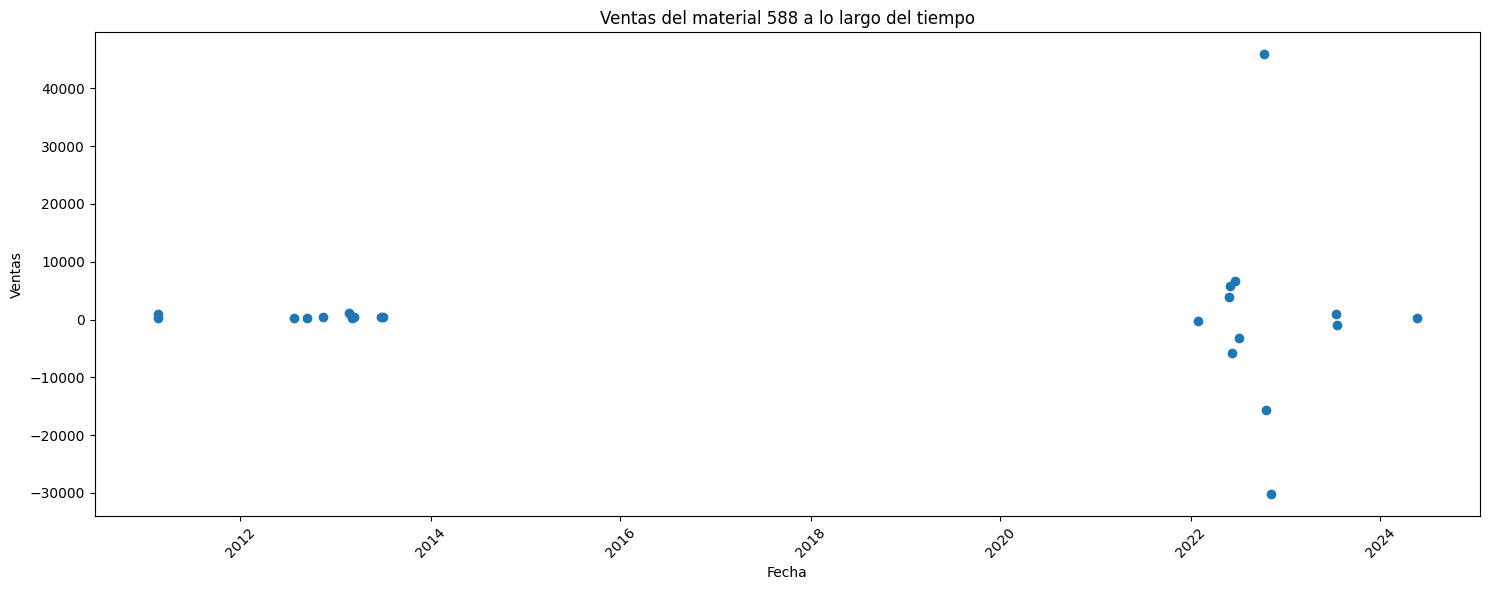

In [ ]:
df_588 = df[df["id_material"] == 588]
plt.figure(figsize=(15, 6))
plt.scatter(df_588['fecha'], df_588['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 588 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

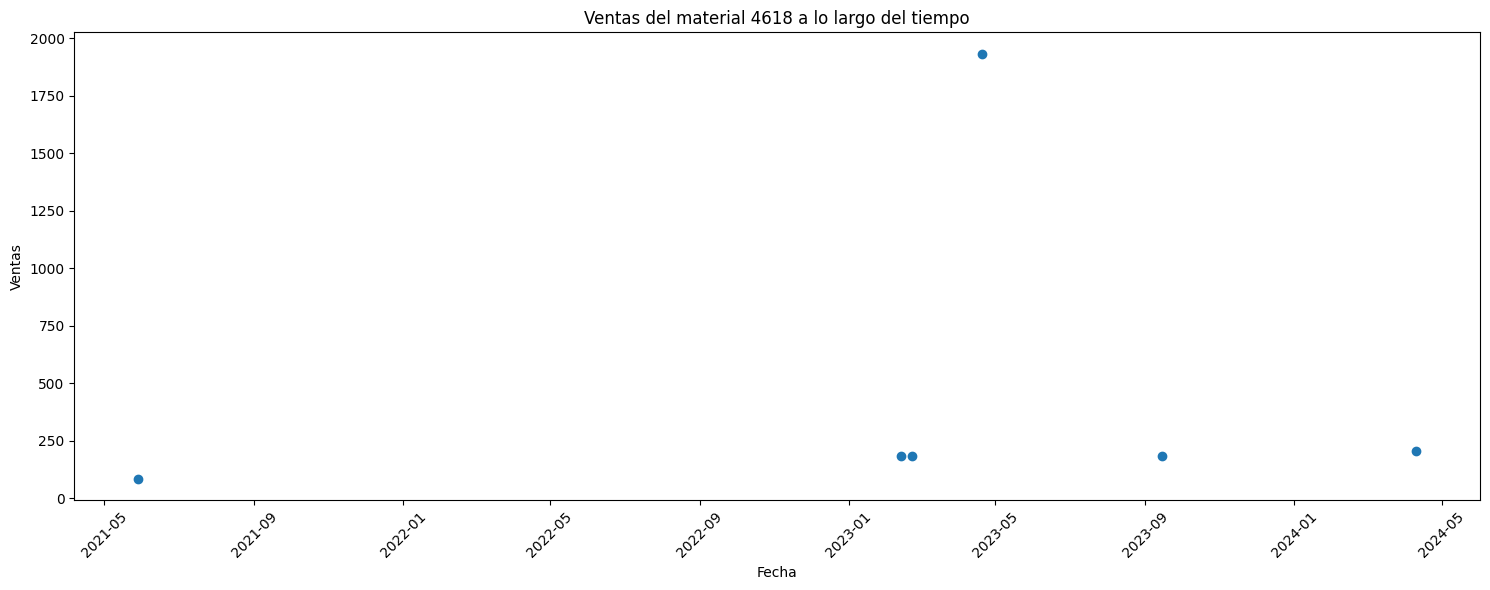

In [ ]:
df_4618 = df[df["id_material"] == 4618]
plt.figure(figsize=(15, 6))
plt.scatter(df_4618['fecha'], df_4618['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 4618 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cosas que no sirven todavia

### Analizamos el primer material de la base de datos (768)

In [ ]:
df_768 = df[df["id_material"] == 768]

In [ ]:
df_768.head()

,fecha,id_material,id_cliente,ventas
0,2013-05-06,768,7939,384
1,2011-09-20,768,7939,384
2,2014-01-08,768,7939,384
3,2011-04-19,768,7939,384
4,2013-03-21,768,7805,384


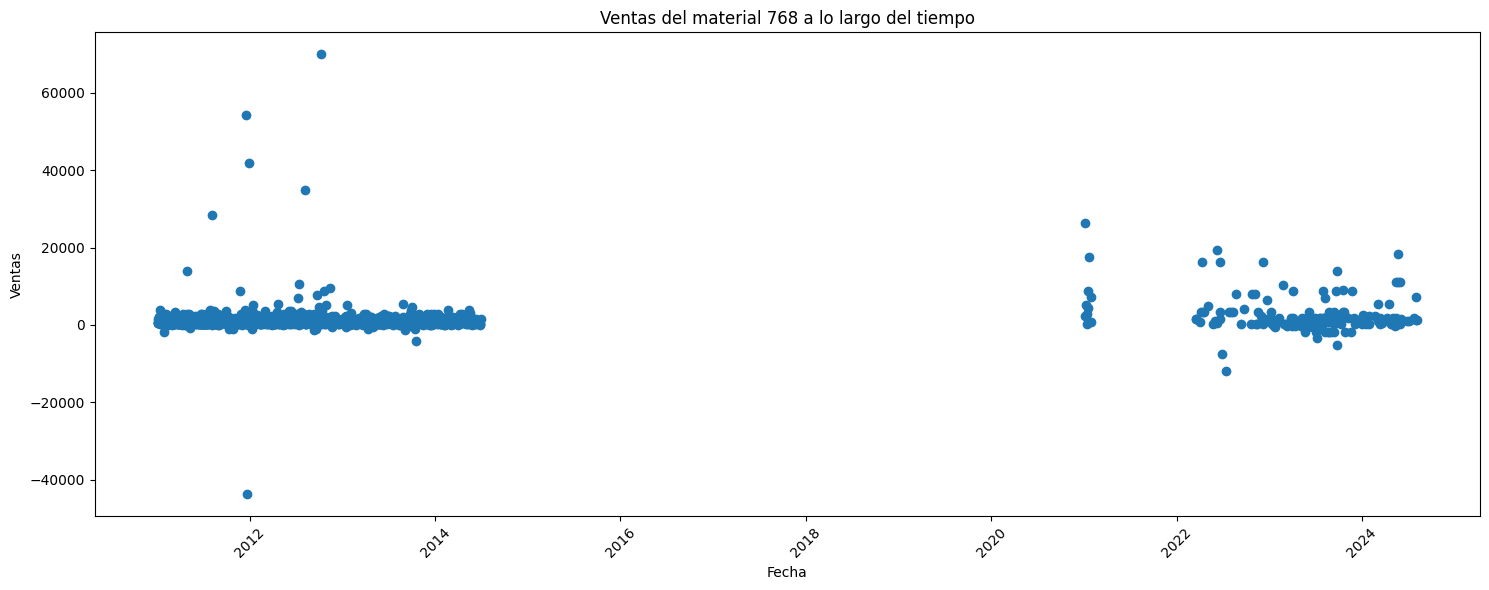

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.scatter(df_768['fecha'], df_768['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 768 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede observar que este material se dejo de vender del 2015 al 2021 y que ha tenido un exito moderado.

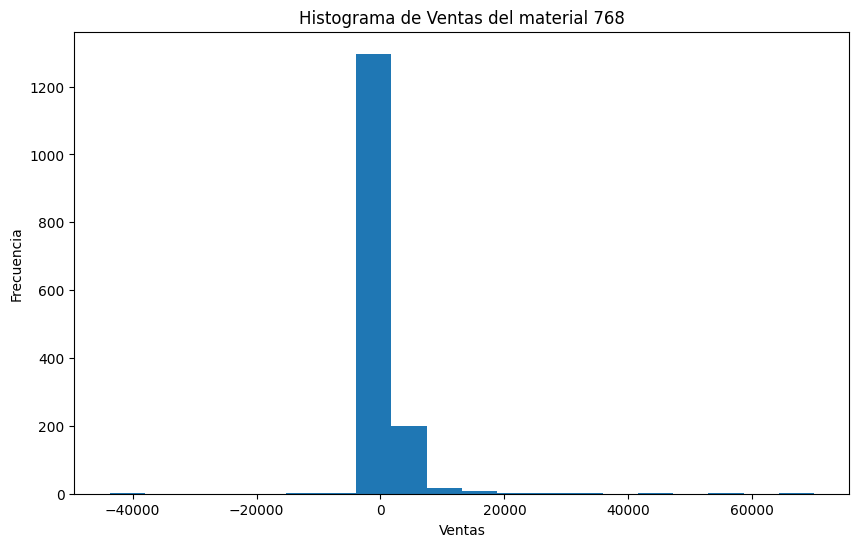

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_768['ventas'], bins=20)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ventas del material 768')
plt.show()

In [ ]:
Lambda = 1 / (df_768['ventas'].mean())
promedio = df_768['ventas'].mean()
Lambda

0.0008326792145366804

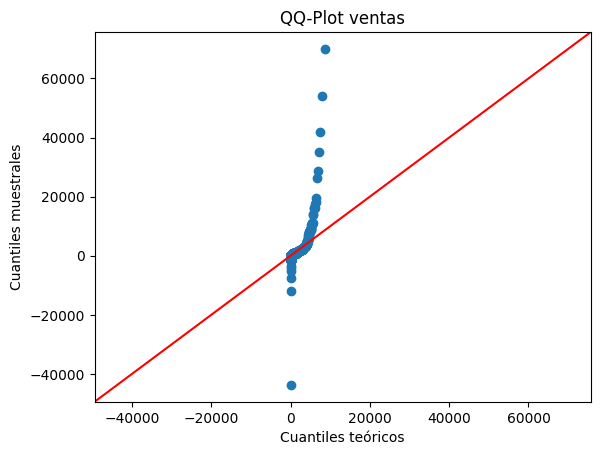

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
figura = sm.qqplot(df_768['ventas'], stats.expon, line='45', scale=promedio)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.title('QQ-Plot ventas')
plt.show()

## Elegir materiales a trabajar

In [ ]:
ids_materiales_a_trabajar = []

In [ ]:
import warnings
warnings.filterwarnings('ignore')

materiales = df["id_material"].unique()
for i in materiales:
    df_i = df[df["id_material"] == i]
    promedio = df_i['ventas'].mean()
    df_i['ventas'] = df_i['ventas'].astype(float)

    test_kolmogorov = stats.kstest(df_i['ventas'],
                               'expon', args=(0, promedio))

    if test_kolmogorov.pvalue > 0.05:
      print(f"Material {i}: {test_kolmogorov.pvalue}")
      ids_materiales_a_trabajar.append(i)

Material 2560: 0.1512717368192944
Material 1025: 0.553020883770657
Material 2049: 0.2706705664732254
Material 3841: 0.31453560021165594
Material 3842: 0.15281021865490474
Material 6914: 0.4769225112987783
Material 2819: 0.11632865769588951
Material 2052: 0.7357588823428847
Material 2053: 0.0758965519396281
Material 1286: 0.4454389623589976
Material 4102: 0.1875
Material 775: 0.3532534261326856
Material 1287: 0.5
Material 2311: 0.19653241063658522
Material 2057: 0.7357588823428847
Material 4873: 0.7357588823428847
Material 3338: 0.7357588823428847
Material 4618: 0.08851816411862568
Material 1291: 0.061634598712506206
Material 2827: 0.6388911266242887
Material 3339: 0.7357588823428847
Material 1292: 0.1841419848440401
Material 2060: 0.7357588823428847
Material 3340: 0.7357588823428847
Material 4876: 0.7186867979036654
Material 2061: 0.20178761282615265
Material 3341: 0.7357588823428847
Material 1038: 0.7357588823428847
Material 2062: 0.7357588823428847
Material 783: 0.22170766680754117
M

In [ ]:
len(ids_materiales_a_trabajar)

629

In [ ]:
4471

4471

## Material 4471

In [ ]:
df_4471 = df[df["id_material"] == 4471]

In [ ]:
df_4471.head()

,fecha,id_material,id_cliente,ventas
482613,2021-04-08,4471,8984,9648
482614,2022-09-30,4471,8984,2045
482615,2023-06-13,4471,8984,1824
482616,2022-01-07,4471,8984,643
482617,2023-04-05,4471,8984,10944


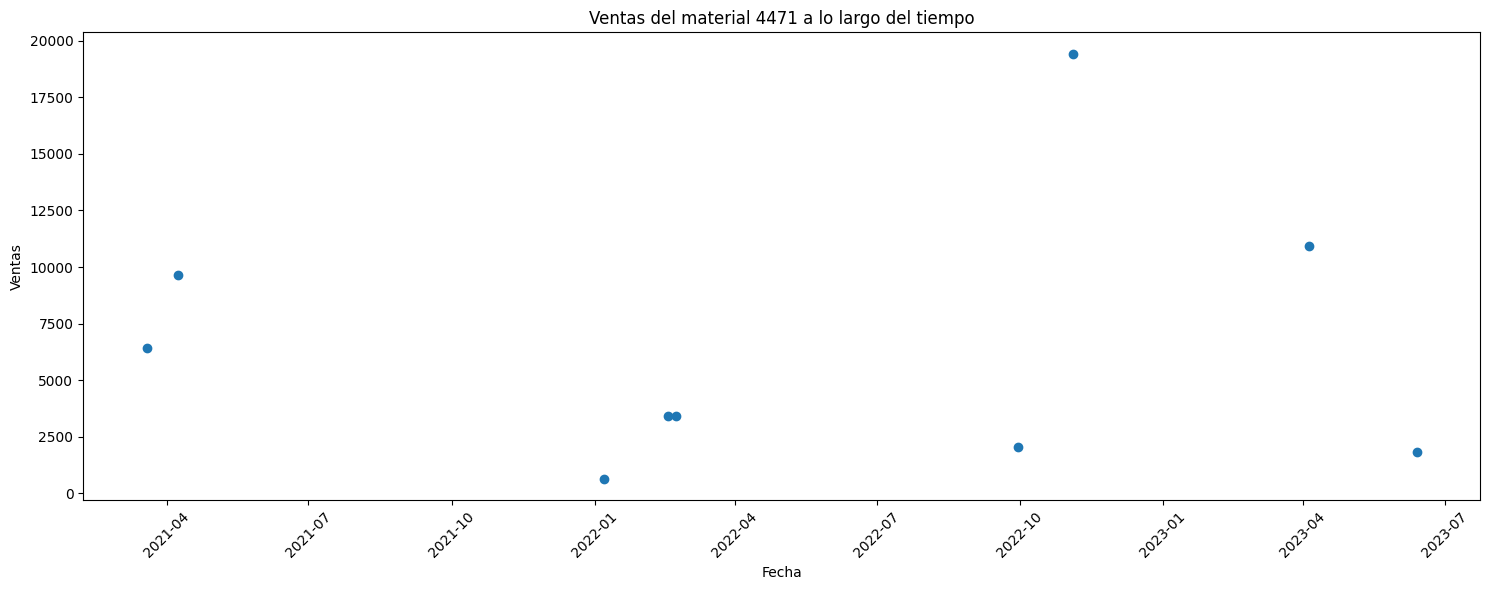

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.scatter(df_4471['fecha'], df_4471['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas del material 4471 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

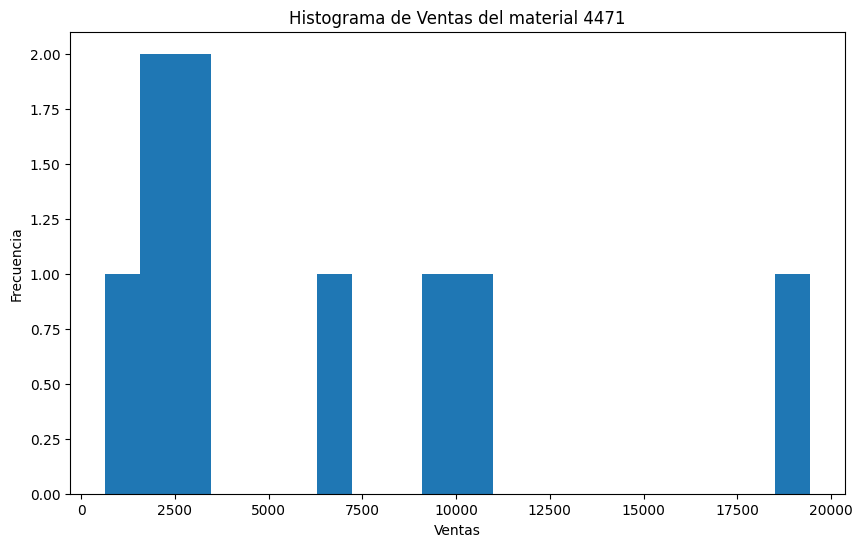

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_4471['ventas'], bins=20)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ventas del material 4471')
plt.show()

In [ ]:
Lambda = 1 / (df_4471['ventas'].mean())
promedio = df_4471['ventas'].mean()
Lambda

0.00015574706676357595

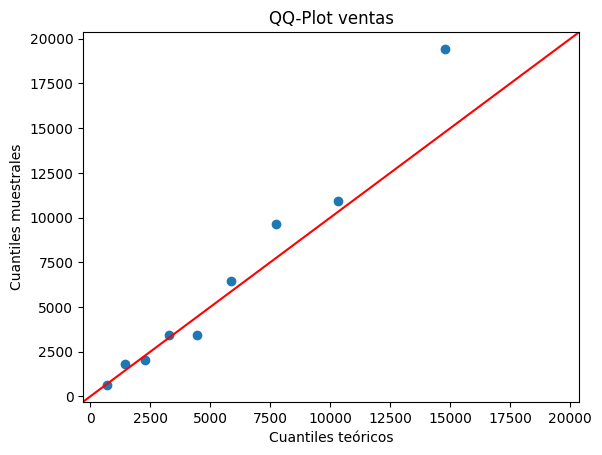

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
figura = sm.qqplot(df_4471['ventas'], stats.expon, line='45', scale=promedio)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.title('QQ-Plot ventas')
plt.show()

In [ ]:
df_4471['ventas'] = df_4471['ventas'].astype(float)
test_kolmogorov = stats.kstest(df_4471['ventas'],
                               'expon', args=(0, promedio))
test_kolmogorov

KstestResult(statistic=0.14360646708554636, pvalue=0.9792880593234257, statistic_location=3409.0, statistic_sign=1)